### 1. Loss(损失函数)
#### https://blog.csdn.net/weixin_42692506/article/details/81840248
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

In [6]:
import random
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

In [5]:
data = load_boston()

In [6]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
x, y = data['data'], data['target']

In [8]:
x_rm = x[:, 5]

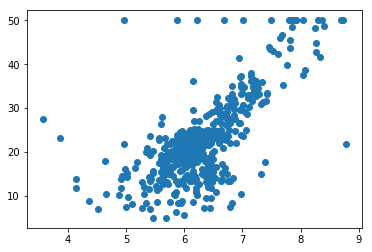

In [9]:
plt.scatter(x_rm, y)

In [3]:
#目测成线性
def price(rm, k, b):
    return k * rm + b

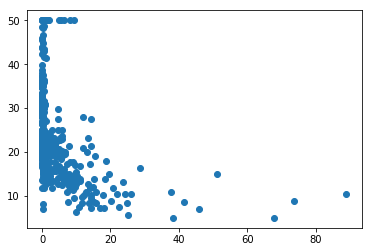

In [111]:
x_crim = x[:, 0]
plt.scatter(x_crim, y)

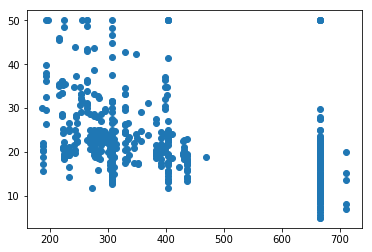

In [112]:
x_tax = x[:, 9]
plt.scatter(x_tax, y)

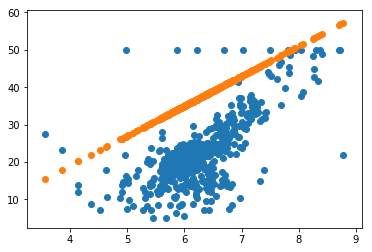

In [35]:
k = random.randint(0, 10)
b = random.randint(-100, 100)
price_by_kb = [price(x, k, b) for x in x_rm]

plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_kb)

#### LOSS展开
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$
$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [72]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

### 1.1 random generation
#### 随机生成k,b，观察损失函数

In [56]:
def random_price():
    trying_times = 5000

    min_loss = float('inf')
    best_k, best_b = None, None

    for i in range(trying_times):
        k = random.random() * 10
        b = random.random() * 200 - 100
        price_by_random = [price(x, k, b) for x in x_rm]

        current_loss = loss(y,price_by_random)
        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = k, b
    return (k, b, min_loss)

8.74678082848622 -29.611385386170213 43.75492787187981


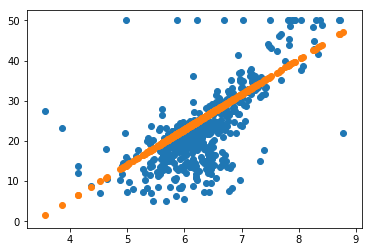

In [67]:
best_k, best_b, min_loss = random_price()
print(best_k, best_b, min_loss)
plt.scatter(x_rm, y)
plt.scatter(x_rm, [price(x, best_k, best_b) for x in x_rm])

#### 8.74678082848622 -29.611385386170213 43.75492787187981(k, b, min_loss)

### 1.2 direction adjusting
#### 让k,b，沿着一定的方向，观察损失函数

In [91]:
def direct_price():
    trying_times = 2000

    min_loss = float('inf')

    k = random.random() * 10
    b = random.random() * 200 - 100

    direction = [
        #k, b
        ( 1,  1),
        ( 1, -1),
        (-1,  1),
        (-1, -1)
    ]

    next_direction = random.choice(direction)

    for i in range(trying_times):
        k_direct, b_direct = next_direction
        current_k, current_b = k + k_direct * 0.1, b + b_direct * 0.1
        price_by_direct = [price(x, current_k, current_b) for x in x_rm]
        current_loss = loss(y, price_by_direct)

        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = current_k, current_b
        else:
            next_direction = random.choice(direction)
    return (best_k, best_b, min_loss)

8.42606489704304 -24.998816595833084 73.23589954311069


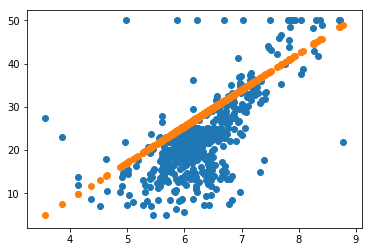

In [108]:
best_k, best_b, min_loss = direct_price()
print(best_k, best_b, min_loss)
plt.scatter(x_rm, y)
plt.scatter(x_rm, [price(x, best_k, best_b) for x in x_rm])

#### 8.42606489704304 -24.998816595833084 73.23589954311069(k, b, min_loss)

### 1.3 gradient descent
##### https://www.cnblogs.com/pinard/p/5970503.html
#### 梯度下降，用导数来限定变化的方向

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [73]:
def partial_k(x, y, y_hat):
    return sum([(y_i - y_hat_i) * x_i for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat))]) * (-2 / len(y))

def partial_b(y, y_hat):
    return sum([(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))]) * (-2 / len(y))

In [77]:
def gradient_price():
    trying_times = 2000

    min_loss = float('inf')

    k = random.random() * 10
    b = random.random() * 200 - 100
    learning_rate = 1e-02

    for i in range(trying_times):
        price_by_gradient = [price(x, k, b) for x in x_rm]
        current_loss = loss(y, price_by_gradient)

        if current_loss < min_loss:
            min_loss = current_loss
            if i % 50 == 0: 
                print('When time is: {}, best_k: {}, best_b: {}, loss: {}'.format(i, k, b, min_loss))
            
        k_gradient = partial_k(x_rm, y, price_by_gradient)
        b_gradient = partial_b(y, price_by_gradient)
        
        k += (-1 * k_gradient) * learning_rate
        b += (-1 * b_gradient) * learning_rate

    return (k, b, min_loss)

When time is: 0, best_k: 5.321566543691272, best_b: -78.07052145945859, loss: 4561.00426241698
When time is: 50, best_k: 15.590575818162305, best_b: -75.94452402837472, loss: 64.58939526656926
When time is: 100, best_k: 15.51301886911198, best_b: -75.45117512299487, loss: 64.09063278907624
When time is: 150, best_k: 15.436388961918704, best_b: -74.96372324026764, loss: 63.603722513397436
When time is: 200, best_k: 15.360675015607601, best_b: -74.48209789280415, loss: 63.12838279306949
When time is: 250, best_k: 15.285866081655197, best_b: -74.00622943575456, loss: 62.66433867445559
When time is: 300, best_k: 15.211951342406222, best_b: -73.53604905673713, loss: 62.21132173770222
When time is: 350, best_k: 15.138920109509371, best_b: -73.07148876588785, loss: 61.76906994147552
When time is: 400, best_k: 15.06676182237169, best_b: -72.6124813860287, loss: 61.3373274713873
When time is: 450, best_k: 14.9954660466315, best_b: -72.1589605429537, loss: 60.9158445920225
When time is: 500, bes

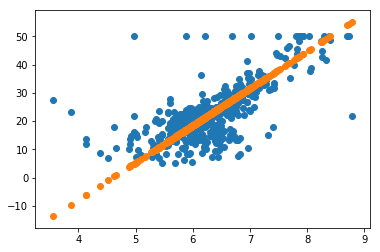

In [81]:
best_k, best_b, min_loss = gradient_price()
print(best_k, best_b, min_loss)
plt.scatter(x_rm, y)
plt.scatter(x_rm, [price(x, best_k, best_b) for x in x_rm])

### new loss
$$ Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|) $$

$$y_i > \hat{y_i}$$
$$ \frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum(-x_i)$$
$$y_i < \hat{y_i}$$
$$ \frac{\partial{loss}}{\partial{b}} = \frac{1}{n}\sum(-1)$$

$$y_i < \hat{y_i}$$
$$ \frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum(x_i)$$
$$y_i < \hat{y_i}$$
$$ \frac{\partial{loss}}{\partial{b}} = \frac{1}{n}\sum(1)$$

In [82]:
def new_loss(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [83]:
def new_partial_k(x, y, y_hat):
    return sum([-1 * x_i if y_i > y_hat_i else x_i for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat))]) / len(list(y))

def new_partial_b(y, y_hat):
    return sum([-1 if y_i > y_hat_i else 1 for y_i, y_hat_i in zip(list(y), list(y_hat))]) / len(list(y))

In [84]:
def new_gradient_price():
    trying_times = 2000

    min_loss = float('inf')

    k = random.random() * 10
    b = random.random() * 200 - 100
    learning_rate = 1e-02

    for i in range(trying_times):
        price_by_gradient = [price(x, k, b) for x in x_rm]
        current_loss = new_loss(y, price_by_gradient)

        if current_loss < min_loss:
            min_loss = current_loss
            
            if i % 50 == 0: 
                print('When time is: {}, best_k: {}, best_b: {}, loss: {}'.format(i, k, b, min_loss))
        k_gradient = new_partial_k(x_rm, y, price_by_gradient)
        b_gradient = new_partial_b(y, price_by_gradient)
        
        k += (-1 * k_gradient) * learning_rate
        b += (-1 * b_gradient) * learning_rate

    return (k, b, min_loss)

When time is: 0, best_k: 1.6352580178635445, best_b: 3.094959260732651, loss: 9.754800032494817
When time is: 50, best_k: 2.910731061341808, best_b: 3.282706296305773, loss: 5.585392710660722
When time is: 100, best_k: 2.9732078597607825, best_b: 3.2693466125113, loss: 5.570971012818559
When time is: 150, best_k: 2.978814183871452, best_b: 3.246698391167436, loss: 5.569862085796478
When time is: 200, best_k: 2.982461614701488, best_b: 3.223733964289975, loss: 5.568780194871757
When time is: 250, best_k: 2.9861090455315242, best_b: 3.2007695374125142, loss: 5.5676994301348754
When time is: 300, best_k: 2.9900013380216395, best_b: 3.177844636226753, loss: 5.566618779901606
When time is: 350, best_k: 2.9936487688516755, best_b: 3.154880209349292, loss: 5.565536888976885
When time is: 400, best_k: 2.9972961996817116, best_b: 3.131915782471831, loss: 5.56445499805218
When time is: 450, best_k: 3.0009436305117476, best_b: 3.10895135559437, loss: 5.563373908919498
When time is: 500, best_k: 3

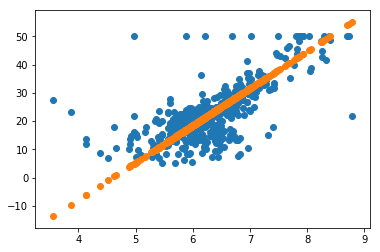

In [92]:
k, b, min_loss = new_gradient_price()
print(k, b, min_loss)
plt.scatter(x_rm, y)
plt.scatter(x_rm, [price(x, best_k, best_b) for x in x_rm])

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: 公式有时并不是那么显而易见，可能需要筛除很多无用数据才能得到，而太复杂的可能本身就没有公式。所以我们才需要用机器学习来找出一个最优解。

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: 不能保持往损失减少的方向进行，随机范围太广或太窄都不不利于得出最优解，而且波动会比较大，不太容易找到最优解。

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans: 比第一种要有优势，至少可以保持某一个单方向的更优解，但是劣势也是很明显的，在极值处会重新选取随机点，这样也不利于寻找到最优解。

###### 4. Why do we use `Derivative / Gradient` to fit a target function? 

Ans: Derivative为导数的意思，导数可以让我们知道数据变化的趋势，Gradient为梯度的意思，结合起来理解就是我们可以知道数据变化的梯度，在梯度上升时，我们需要将导数趋于小，梯度下降，我们需要将导数趋于大。通过这样不断调节，去找到最优解。

###### 5. In the words 'Gredient Descent', what's the `Gradient` and what's the `Descent`?

Ans: 在微积分里面，对多元函数的参数求∂偏导数，把求得的各个参数的偏导数以向量的形式写出来，就是梯度。在最小化损失函数时，可以通过梯度下降法来一步步的迭代求解，得到最小化的损失函数和模型参数值。

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans: 函数可以预知函数值的方向，更好的做出调节，如果次数足够多，可以得出很接近的最优解。

###### 7. Using the simple words to describe: What's the machine leanring.

Ans: （Machine learning is programming computers to optimize a performance criterion using example data or past experience.————Alpaydin） So on.
自己理解：利用大量数据及数学工具，让计算机帮我们找出最优决策。

## 3. Finish the search problem

In [7]:
import requests
import json
import networkx as nx
from geopy.distance import geodesic

# display chinese
plt.rcParams['font.sans-serif']=['SimHei']

In [95]:
#download data
url = "http://map.amap.com/service/subway?_1563091274457&srhdata=3100_drw_shanghai.json"

headers = {
    'Host': 'map.amap.com',
    'Referer': 'http://map.amap.com/subway/index.html?&3100',
    'Cache-Control': 'max-age=0',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.140 Safari/537.36 Edge/17.17134',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Encoding': 'gzip, deflate',
    'Accept-Language': 'en-US,en;q=0.9'
}

r = requests.get(url=url, headers=headers)
response = r.text
with open("SH_Subway.txt", 'w', encoding='utf-8') as f:
    f.write(response)

In [8]:
#read data
with open("SH_Subway.txt", 'r', encoding='utf-8') as f:
    data = json.load(f)

In [9]:
#date clean
sh_station = {}
sh_location = {}
subway_lines = len(data['l'])
for i in range(subway_lines):
    subway_name = data['l'][i]['kn']
    x_list = []
    for j in range(len(data['l'][i]['st'])):
        station_name = data['l'][i]['st'][j]['n']
        station_position = data['l'][i]['st'][j]['sl']
        lon, lat = station_position.split(',')
        x_list.append(station_name)
        sh_location[station_name] = (float(lat), float(lon))
    sh_station[subway_name] = x_list

In [10]:
sh_station

{'地铁1号线': ['莘庄',
  '外环路',
  '莲花路',
  '锦江乐园',
  '上海南站',
  '漕宝路',
  '上海体育馆',
  '徐家汇',
  '衡山路',
  '常熟路',
  '陕西南路',
  '黄陂南路',
  '人民广场',
  '新闸路',
  '汉中路',
  '上海火车站',
  '中山北路',
  '延长路',
  '上海马戏城',
  '汶水路',
  '彭浦新村',
  '共康路',
  '通河新村',
  '呼兰路',
  '共富新村',
  '宝安公路',
  '友谊西路',
  '富锦路'],
 '地铁2号线': ['广兰路',
  '金科路',
  '张江高科',
  '龙阳路',
  '世纪公园',
  '上海科技馆',
  '世纪大道',
  '东昌路',
  '陆家嘴',
  '南京东路',
  '人民广场',
  '南京西路',
  '静安寺',
  '江苏路',
  '中山公园',
  '娄山关路',
  '威宁路',
  '北新泾',
  '淞虹路',
  '虹桥2号航站楼',
  '虹桥火车站',
  '徐泾东'],
 '地铁2号线东延线': ['浦东国际机场',
  '海天三路',
  '远东大道',
  '凌空路',
  '川沙',
  '华夏东路',
  '创新中路',
  '唐镇',
  '广兰路'],
 '地铁3号线': ['江杨北路',
  '铁力路',
  '友谊路',
  '宝杨路',
  '水产路',
  '淞滨路',
  '张华浜',
  '淞发路',
  '长江南路',
  '殷高西路',
  '江湾镇',
  '大柏树',
  '赤峰路',
  '虹口足球场',
  '东宝兴路',
  '宝山路',
  '上海火车站',
  '中潭路',
  '镇坪路',
  '曹杨路',
  '金沙江路',
  '中山公园',
  '延安西路',
  '虹桥路',
  '宜山路',
  '漕溪路',
  '龙漕路',
  '石龙路',
  '上海南站'],
 '地铁4号线': ['宜山路',
  '虹桥路',
  '延安西路',
  '中山公园',
  '金沙江路',
  '曹杨路',
  '镇坪路',
  '中潭路',
  '上海火车站',
  '宝山路',
  '海伦路',
  '

In [11]:
sh_location

{'莘庄': (31.111152, 121.385373),
 '外环路': (31.120899, 121.39302),
 '莲花路': (31.1309, 121.40291),
 '锦江乐园': (31.142217, 121.414107),
 '上海南站': (31.154579, 121.430041),
 '漕宝路': (31.168344, 121.433143),
 '上海体育馆': (31.182813, 121.437423),
 '徐家汇': (31.195338, 121.436837),
 '衡山路': (31.204528, 121.446424),
 '常熟路': (31.213524, 121.449141),
 '陕西南路': (31.21515, 121.458744),
 '黄陂南路': (31.222745, 121.473306),
 '人民广场': (31.232781, 121.475137),
 '新闸路': (31.238373, 121.468151),
 '汉中路': (31.241883, 121.458699),
 '上海火车站': (31.249632, 121.457939),
 '中山北路': (31.258891, 121.459204),
 '延长路': (31.271675, 121.455329),
 '上海马戏城': (31.279895, 121.452023),
 '汶水路': (31.292556, 121.450251),
 '彭浦新村': (31.306604, 121.448642),
 '共康路': (31.318936, 121.447063),
 '通河新村': (31.33113, 121.441546),
 '呼兰路': (31.339703, 121.437711),
 '共富新村': (31.355082, 121.434063),
 '宝安公路': (31.369555, 121.430914),
 '友谊西路': (31.381296, 121.427953),
 '富锦路': (31.39226, 121.424661),
 '广兰路': (31.21105, 121.621072),
 '金科路': (31.204213, 121.601989),
 '

In [13]:
# geodesic(lat, lon)
xin_zhuang = sh_location['莘庄']
wai_huan_lu = sh_location['外环路']
geodesic(xin_zhuang, wai_huan_lu).km

1.3038063050923483

In [14]:
#adjust (lat, lon) to (lon, lat)
location = {}
for (key, value) in sh_location.items():
    lat, lon = value
    location[key] = (lon, lat)
location

{'莘庄': (121.385373, 31.111152),
 '外环路': (121.39302, 31.120899),
 '莲花路': (121.40291, 31.1309),
 '锦江乐园': (121.414107, 31.142217),
 '上海南站': (121.430041, 31.154579),
 '漕宝路': (121.433143, 31.168344),
 '上海体育馆': (121.437423, 31.182813),
 '徐家汇': (121.436837, 31.195338),
 '衡山路': (121.446424, 31.204528),
 '常熟路': (121.449141, 31.213524),
 '陕西南路': (121.458744, 31.21515),
 '黄陂南路': (121.473306, 31.222745),
 '人民广场': (121.475137, 31.232781),
 '新闸路': (121.468151, 31.238373),
 '汉中路': (121.458699, 31.241883),
 '上海火车站': (121.457939, 31.249632),
 '中山北路': (121.459204, 31.258891),
 '延长路': (121.455329, 31.271675),
 '上海马戏城': (121.452023, 31.279895),
 '汶水路': (121.450251, 31.292556),
 '彭浦新村': (121.448642, 31.306604),
 '共康路': (121.447063, 31.318936),
 '通河新村': (121.441546, 31.33113),
 '呼兰路': (121.437711, 31.339703),
 '共富新村': (121.434063, 31.355082),
 '宝安公路': (121.430914, 31.369555),
 '友谊西路': (121.427953, 31.381296),
 '富锦路': (121.424661, 31.39226),
 '广兰路': (121.621072, 31.21105),
 '金科路': (121.601989, 31.204213),
 '

In [15]:
sh_subway = nx.Graph()
sh_subway.add_nodes_from(list(location.keys()))

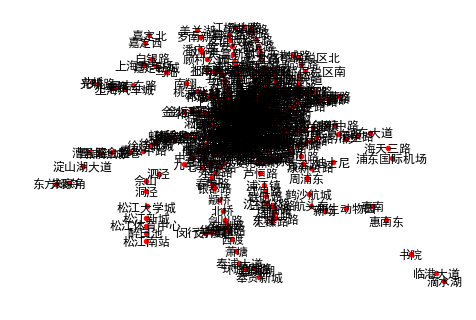

In [16]:
nx.draw(sh_subway, location, with_labels=True, node_size=20)

In [17]:
def get_nodes(line_list):
    a = {}
    l = len(line_list)
    for i in range(l):
        if i == 0: #first one, append the next one
            a[line_list[0]] = [line_list[1]]
        elif i == l - 1: # last one, append the previous
            a[line_list[l - 1]] = [line_list[l - 2]]
        else: #append the previous and follow
            a[line_list[i]] = []
            a[line_list[i]].append(line_list[i - 1])
            a[line_list[i]].append(line_list[i + 1])
    return a

In [18]:
a = get_nodes(sh_station['地铁1号线'])
a

{'莘庄': ['外环路'],
 '外环路': ['莘庄', '莲花路'],
 '莲花路': ['外环路', '锦江乐园'],
 '锦江乐园': ['莲花路', '上海南站'],
 '上海南站': ['锦江乐园', '漕宝路'],
 '漕宝路': ['上海南站', '上海体育馆'],
 '上海体育馆': ['漕宝路', '徐家汇'],
 '徐家汇': ['上海体育馆', '衡山路'],
 '衡山路': ['徐家汇', '常熟路'],
 '常熟路': ['衡山路', '陕西南路'],
 '陕西南路': ['常熟路', '黄陂南路'],
 '黄陂南路': ['陕西南路', '人民广场'],
 '人民广场': ['黄陂南路', '新闸路'],
 '新闸路': ['人民广场', '汉中路'],
 '汉中路': ['新闸路', '上海火车站'],
 '上海火车站': ['汉中路', '中山北路'],
 '中山北路': ['上海火车站', '延长路'],
 '延长路': ['中山北路', '上海马戏城'],
 '上海马戏城': ['延长路', '汶水路'],
 '汶水路': ['上海马戏城', '彭浦新村'],
 '彭浦新村': ['汶水路', '共康路'],
 '共康路': ['彭浦新村', '通河新村'],
 '通河新村': ['共康路', '呼兰路'],
 '呼兰路': ['通河新村', '共富新村'],
 '共富新村': ['呼兰路', '宝安公路'],
 '宝安公路': ['共富新村', '友谊西路'],
 '友谊西路': ['宝安公路', '富锦路'],
 '富锦路': ['友谊西路']}

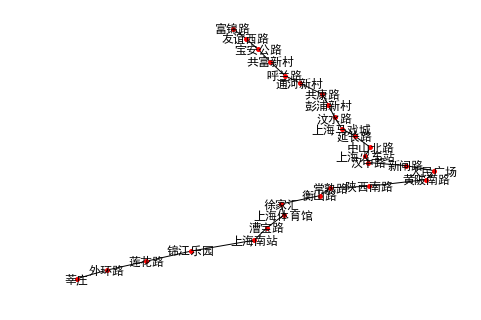

In [19]:
nx.draw(nx.Graph(a), location, with_labels=True, node_size=15)

In [20]:
#add merge and duplicate remove
a = {'人民广场': ['大世界', '曲阜路'],
     '五洲大道': ['东靖路', '洲海路'],}
b = {'人民广场': ['黄陂南路', '新闸路','曲阜路'], #test the duplicate
     '港城路': ['外高桥保税区北'],}
c = {}
c['人民广场'] = list(set(a['人民广场'] + b['人民广场']))
c

{'人民广场': ['曲阜路', '新闸路', '黄陂南路', '大世界']}

In [21]:
#get all lines
line = [key for key in sh_station]
line

['地铁1号线',
 '地铁2号线',
 '地铁2号线东延线',
 '地铁3号线',
 '地铁4号线',
 '地铁5号线',
 '地铁6号线',
 '地铁7号线',
 '地铁8号线',
 '地铁9号线',
 '地铁10号线',
 '地铁11号线',
 '地铁12号线',
 '地铁13号线',
 '地铁16号线',
 '地铁17号线',
 '磁悬浮',
 '轨道交通浦江线']

In [22]:
def merge(line_1, line_2):
    c = {}
    del_list = []
    #find the same station
    for key_1 in line_1:
        for key_2 in line_2:
            if key_1 == key_2:
                c[key_1] = list(set(line_1[key_1] + line_2[key_2])) #duplicate remove
                del_list.append(key_1) #append the same station
    for x in del_list:
        del line_1[x]
        del line_2[x]
    c.update(line_1)
    c.update(line_2)
    return c

In [157]:
#test
merge_c = merge(get_nodes(sh_station['地铁1号线']), get_nodes(sh_station['地铁2号线']))
merge_c

{'人民广场': ['新闸路', '南京东路', '南京西路', '黄陂南路'],
 '莘庄': ['外环路'],
 '外环路': ['莘庄', '莲花路'],
 '莲花路': ['外环路', '锦江乐园'],
 '锦江乐园': ['莲花路', '上海南站'],
 '上海南站': ['锦江乐园', '漕宝路'],
 '漕宝路': ['上海南站', '上海体育馆'],
 '上海体育馆': ['漕宝路', '徐家汇'],
 '徐家汇': ['上海体育馆', '衡山路'],
 '衡山路': ['徐家汇', '常熟路'],
 '常熟路': ['衡山路', '陕西南路'],
 '陕西南路': ['常熟路', '黄陂南路'],
 '黄陂南路': ['陕西南路', '人民广场'],
 '新闸路': ['人民广场', '汉中路'],
 '汉中路': ['新闸路', '上海火车站'],
 '上海火车站': ['汉中路', '中山北路'],
 '中山北路': ['上海火车站', '延长路'],
 '延长路': ['中山北路', '上海马戏城'],
 '上海马戏城': ['延长路', '汶水路'],
 '汶水路': ['上海马戏城', '彭浦新村'],
 '彭浦新村': ['汶水路', '共康路'],
 '共康路': ['彭浦新村', '通河新村'],
 '通河新村': ['共康路', '呼兰路'],
 '呼兰路': ['通河新村', '共富新村'],
 '共富新村': ['呼兰路', '宝安公路'],
 '宝安公路': ['共富新村', '友谊西路'],
 '友谊西路': ['宝安公路', '富锦路'],
 '富锦路': ['友谊西路'],
 '广兰路': ['金科路'],
 '金科路': ['广兰路', '张江高科'],
 '张江高科': ['金科路', '龙阳路'],
 '龙阳路': ['张江高科', '世纪公园'],
 '世纪公园': ['龙阳路', '上海科技馆'],
 '上海科技馆': ['世纪公园', '世纪大道'],
 '世纪大道': ['上海科技馆', '东昌路'],
 '东昌路': ['世纪大道', '陆家嘴'],
 '陆家嘴': ['东昌路', '南京东路'],
 '南京东路': ['陆家嘴', '人民广场'],
 '南京西路': ['人民广场', '静安寺'],


In [23]:
sh_nodes = {}
for i in range(len(line)):
    line_node = get_nodes(sh_station[line[i]])
    sh_nodes.update(merge(sh_nodes, line_node))
sh_nodes

{'外环路': ['莘庄', '莲花路'],
 '莲花路': ['外环路', '锦江乐园'],
 '锦江乐园': ['莲花路', '上海南站'],
 '衡山路': ['徐家汇', '常熟路'],
 '黄陂南路': ['陕西南路', '人民广场'],
 '新闸路': ['人民广场', '汉中路'],
 '中山北路': ['上海火车站', '延长路'],
 '延长路': ['中山北路', '上海马戏城'],
 '上海马戏城': ['延长路', '汶水路'],
 '汶水路': ['上海马戏城', '彭浦新村'],
 '彭浦新村': ['汶水路', '共康路'],
 '共康路': ['彭浦新村', '通河新村'],
 '通河新村': ['共康路', '呼兰路'],
 '呼兰路': ['通河新村', '共富新村'],
 '共富新村': ['呼兰路', '宝安公路'],
 '宝安公路': ['共富新村', '友谊西路'],
 '友谊西路': ['宝安公路', '富锦路'],
 '富锦路': ['友谊西路'],
 '金科路': ['广兰路', '张江高科'],
 '张江高科': ['金科路', '龙阳路'],
 '世纪公园': ['龙阳路', '上海科技馆'],
 '上海科技馆': ['世纪公园', '世纪大道'],
 '东昌路': ['世纪大道', '陆家嘴'],
 '陆家嘴': ['东昌路', '南京东路'],
 '娄山关路': ['中山公园', '威宁路'],
 '威宁路': ['娄山关路', '北新泾'],
 '北新泾': ['威宁路', '淞虹路'],
 '淞虹路': ['北新泾', '虹桥2号航站楼'],
 '徐泾东': ['虹桥火车站'],
 '广兰路': ['唐镇', '金科路'],
 '海天三路': ['浦东国际机场', '远东大道'],
 '远东大道': ['海天三路', '凌空路'],
 '凌空路': ['远东大道', '川沙'],
 '川沙': ['凌空路', '华夏东路'],
 '华夏东路': ['川沙', '创新中路'],
 '创新中路': ['华夏东路', '唐镇'],
 '唐镇': ['创新中路', '广兰路'],
 '上海南站': ['锦江乐园', '漕宝路', '石龙路'],
 '江杨北路': ['铁力路'],
 '铁力路': ['江杨北路',

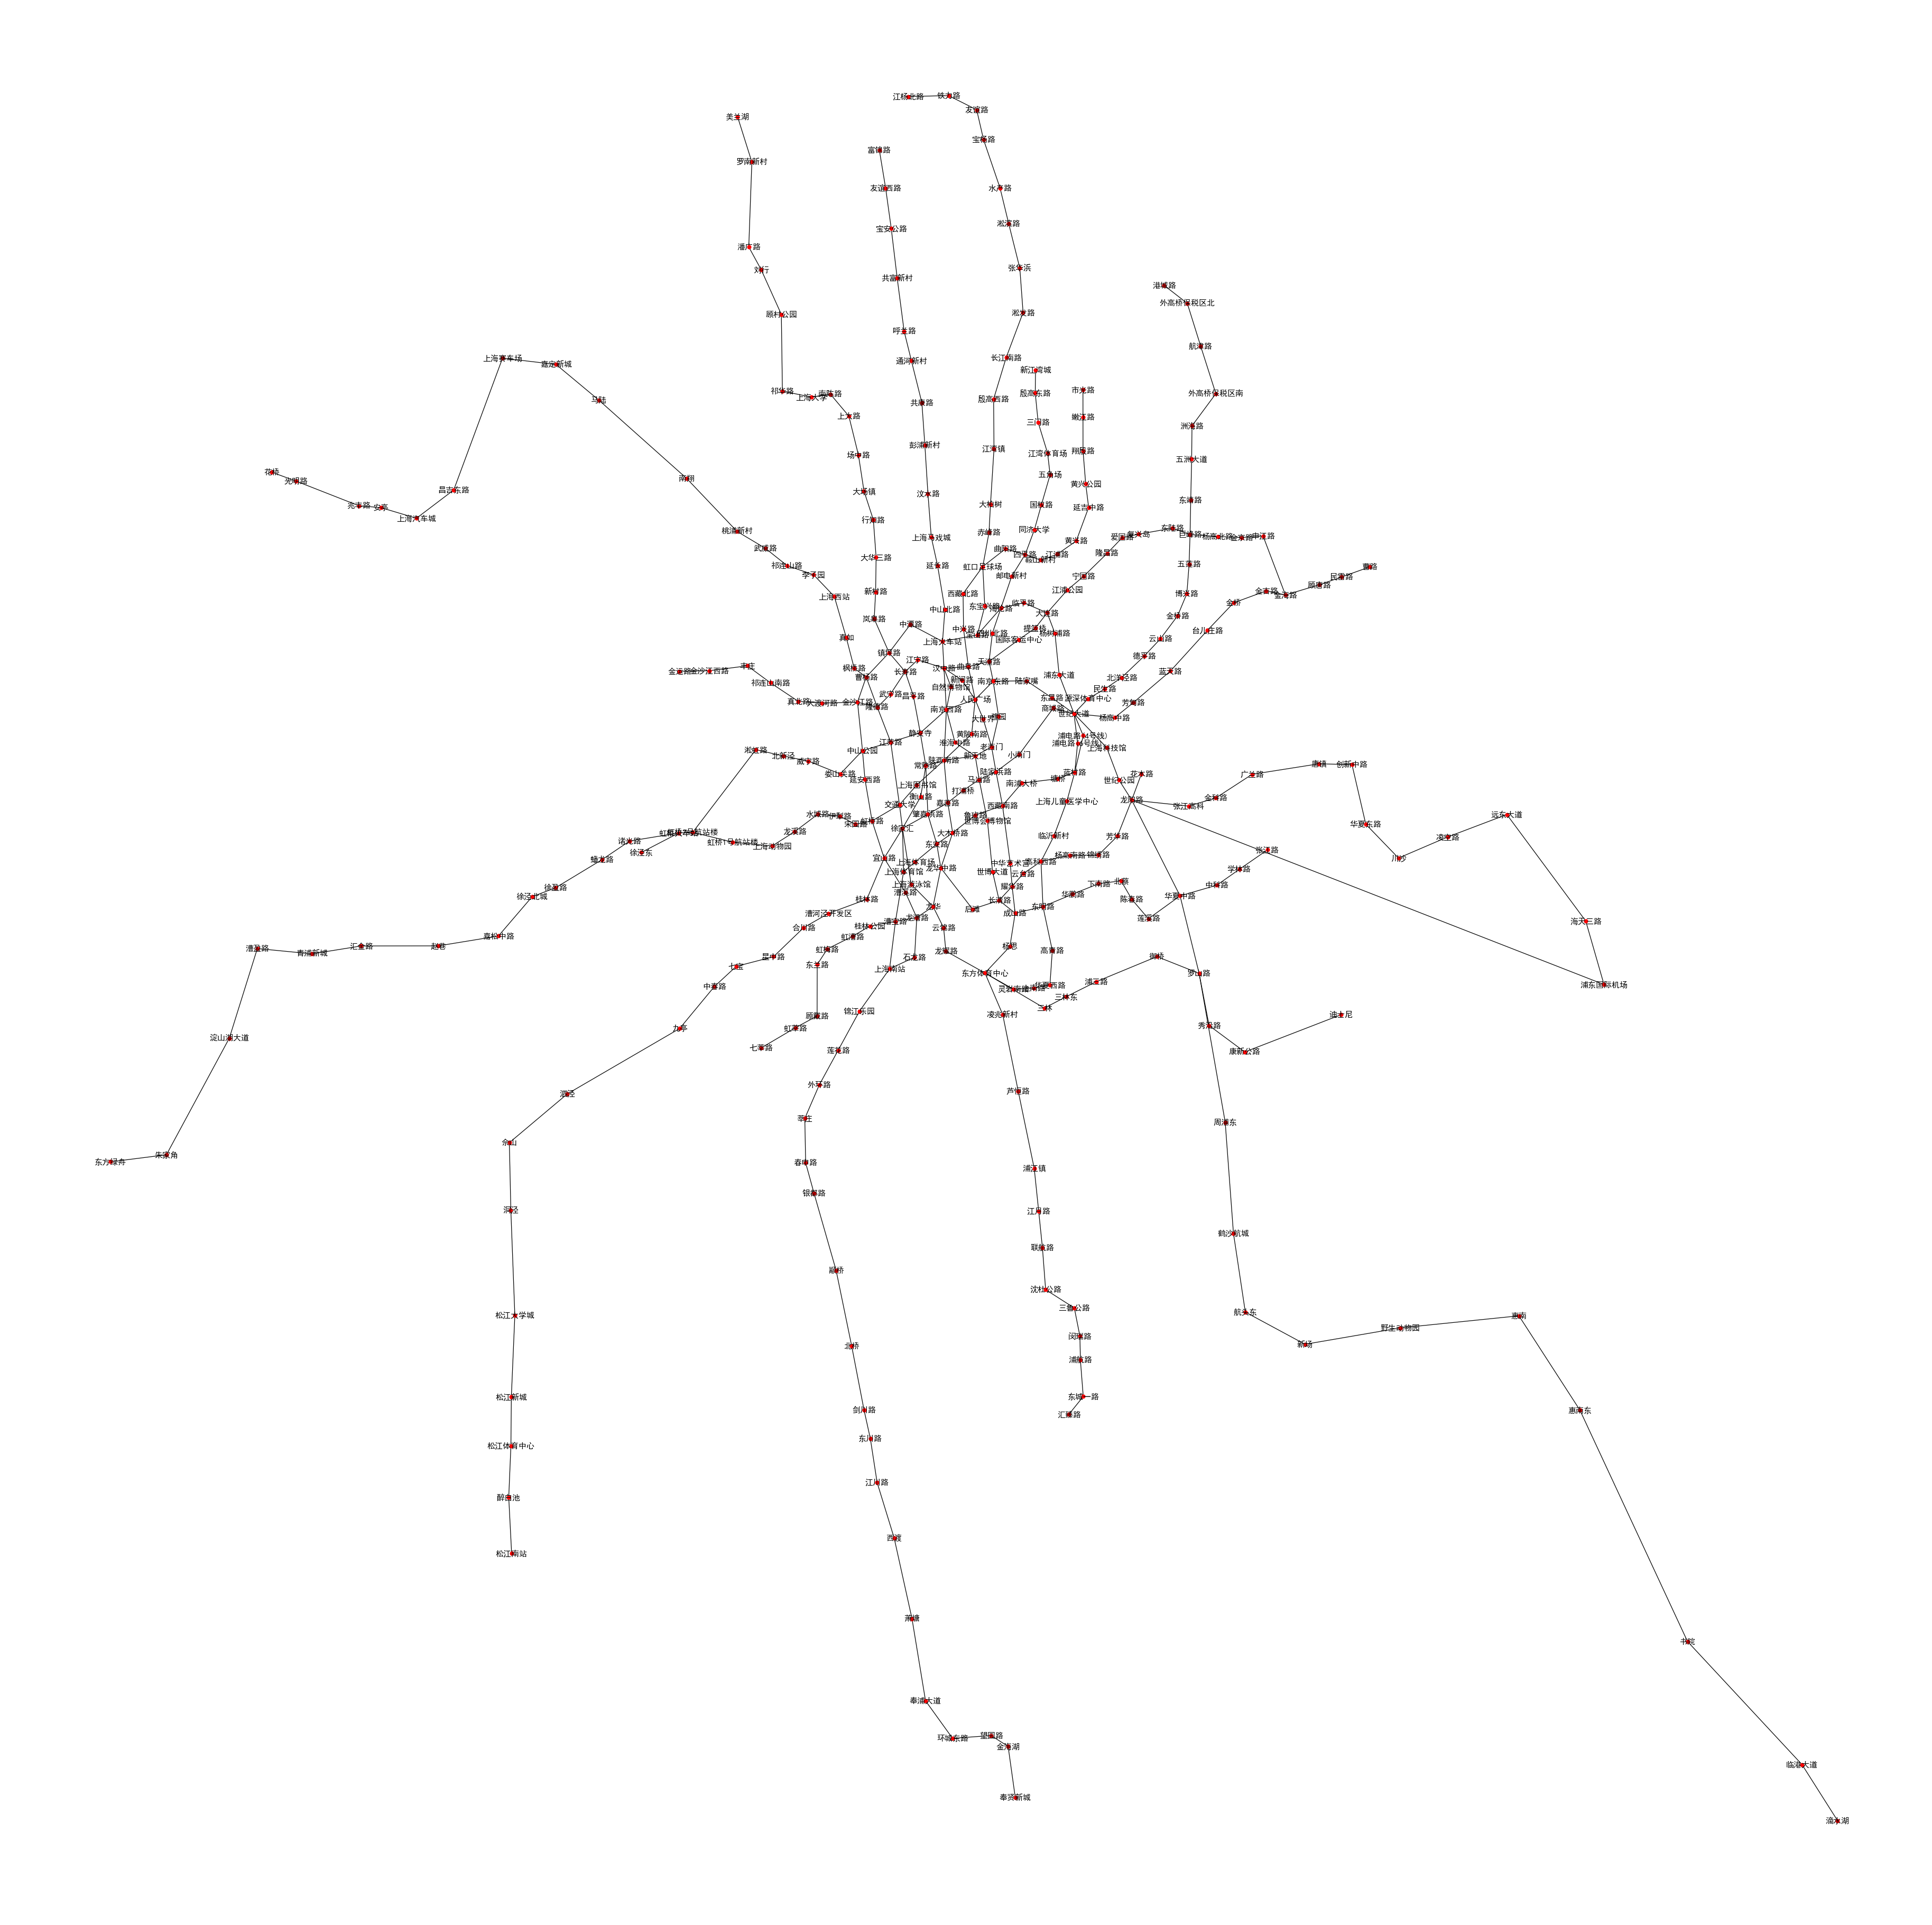

In [170]:
plt.figure(figsize=(40, 40), dpi=90)
nx.draw(nx.Graph(sh_nodes), location, with_labels=True, node_size=30)
plt.savefig('sh_subway.png', dpi=250)

In [1]:
#search test, and the 'sort_candidate' has praticed in lesson-02
def search(start, destination, connection_graph):
    pathes = [[start]]
    visited = set()
    
    while pathes: #we find pathes
        path = pathes.pop(0) 
        frontier = path[-1]
        
        if frontier in visited: continue 
        successors = connection_graph[frontier] #获取它的连接点
        
        for city in successors:
            if city in path: continue
            new_path = path + [city] #DEPTH FIRST SEARCH
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visited.add(frontier)

In [24]:
search('曹路', '桃浦新村', sh_nodes)

['曹路',
 '民雷路',
 '顾唐路',
 '金海路',
 '金吉路',
 '金桥',
 '台儿庄路',
 '蓝天路',
 '芳甸路',
 '杨高中路',
 '世纪大道',
 '东昌路',
 '陆家嘴',
 '南京东路',
 '人民广场',
 '南京西路',
 '静安寺',
 '江苏路',
 '隆德路',
 '曹杨路',
 '枫桥路',
 '真如',
 '上海西站',
 '李子园',
 '祁连山路',
 '武威路',
 '桃浦新村']

In [25]:
search('桃浦新村', '滴水湖', sh_nodes)

['桃浦新村',
 '武威路',
 '祁连山路',
 '李子园',
 '上海西站',
 '真如',
 '枫桥路',
 '曹杨路',
 '隆德路',
 '江苏路',
 '静安寺',
 '南京西路',
 '人民广场',
 '南京东路',
 '陆家嘴',
 '东昌路',
 '世纪大道',
 '上海科技馆',
 '世纪公园',
 '龙阳路',
 '华夏中路',
 '罗山路',
 '周浦东',
 '鹤沙航城',
 '航头东',
 '新场',
 '野生动物园',
 '惠南',
 '惠南东',
 '书院',
 '临港大道',
 '滴水湖']